# Black Friday EDA & Feature Engineering 
 ## (Cleaning & Preparing data for model training)


## 1. Problem Statement
A retail company 'ABC Private Limited' wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import Dataset - Training Dataset
df_train = pd.read_csv('/Users/abhishekjaiswal/Downloads/BlackFriday_Train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# Import Dataset - Test Dataset
df_test = pd.read_csv('/Users/abhishekjaiswal/Downloads/BlackFriday_Test.csv')
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# 2. Understanding the Data

1. Getting the idea of the dataset.
2. Looking for - Categorical Variables, Missing Values, etc.

In [6]:
# Merge both train & test dataset
df = df_train.append(df_test) 
# OR - df = pd.concat([df_train, df_test]) or 'MERGE' can also be used
df.head(5)

/var/folders/q5/frk_2t693llgv1mykk652bnc0000gn/T/ipykernel_55530/3437615271.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Observations -

1. Categorical Variables in - Gender, Age, City_Category
2. Missing values in - Product_Category_2, Product_Category_3
3. User_ID has no significance and we can drop it.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
# Drop - User_ID as it doesn't have any significance on shopping
df.drop(['User_ID'], axis=1, inplace=True)
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [36]:
df.shape

(783667, 11)

In [11]:
# Handle Categorical feature - Gender 
df['Gender'] = df['Gender'].map({'F':1, 'M':0})
# OR - df['Gender'] = pd.get_dummies(['Gender'], drop_first = 1)
# OR - LabelEncoding - from sklearn.preprocessing import LabelEncoder
# df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
# Handle Categorical feature - Age 
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# Handle Categorical feature - City_Category 
df['City_Category'] = df['City_Category'].map({'A':1, 'B':2, 'C':3})
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,3,4+,0,8,NaN,NaN,7969.0


In [15]:
# Checking Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Observations -
- Missing/Null Values in - Product_Category_2, Product_Category_3, Purchase

In [17]:
# Handle Missing Value in - Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [26]:
# Handle Missing Value in - Product_Category_2
# Finding the Mode to replace Missing Values
df['Product_Category_2'].mode()[0]

8.0

In [33]:
# Replacing Missing Values using Mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4+,0,8,8.0,16.0,7969.0


In [28]:
# Re-Checking Missing Values in - Product_Category_2
df['Product_Category_2'].isnull().sum()

0

In [32]:
# Handle Missing Value in - Product_Category_2
# Replacing Missing Values using Mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4+,0,8,8.0,16.0,7969.0


In [34]:
# Re-Checking Missing Values in - Product_Category_3
df['Product_Category_3'].isnull().sum()

0

In [37]:
# Checking other Columns
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
# We can replace 4+ with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

/var/folders/q5/frk_2t693llgv1mykk652bnc0000gn/T/ipykernel_55530/4249733614.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'].str.replace('+', '')


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [42]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4,0,8,8.0,16.0,7969.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 71.7+ MB


### Observations -

- Column- 'Stay_In_Current_City_Years' datatype is object and we need to convert that into an integer.

In [47]:
# Convert - Object into Integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


# 3. Data Visualization

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

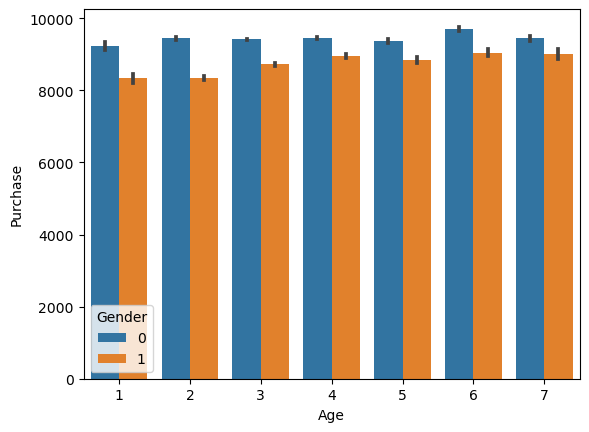

In [50]:
# Age vs Purchases 
# Barplot Arguments
sns.barplot('Age', 'Purchase', hue='Gender', data=df)

### Observations -

- Purchasing of men is higher than women.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

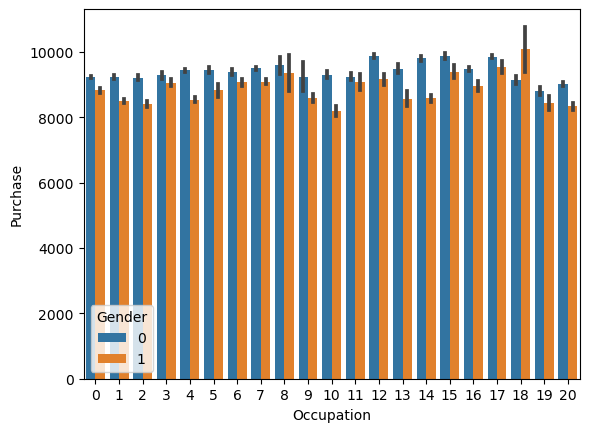

In [51]:
# Occupation vs Purchases
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df)

### Observations -

- Purchasing for Occupation 17 on an average is higher than any other.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

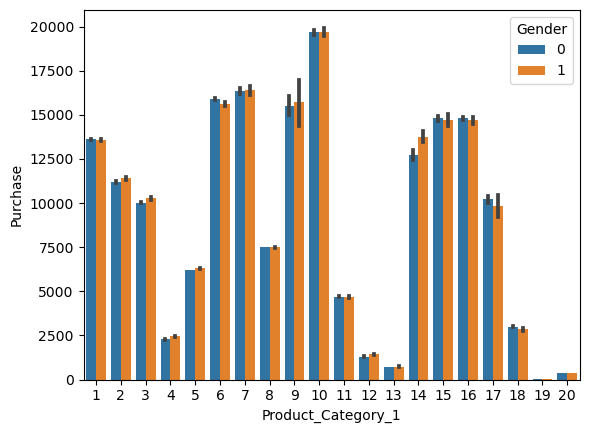

In [52]:
# Product Categories vs Purchases
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

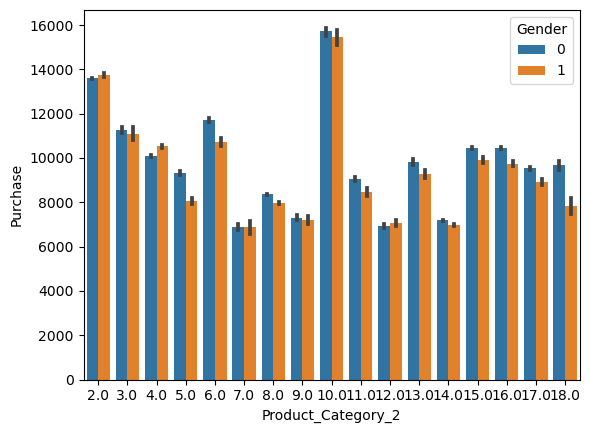

In [53]:
# Product Categories vs Purchases
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

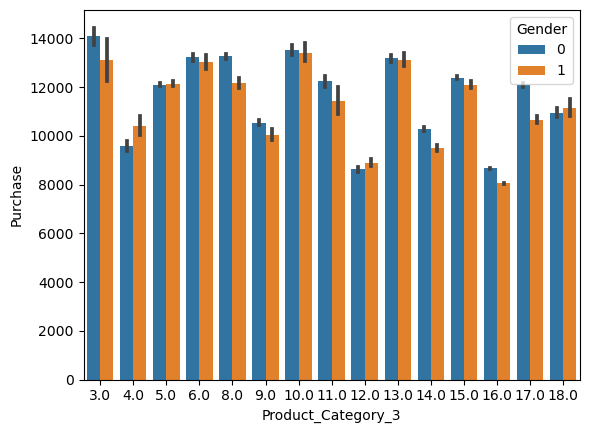

In [54]:
# Product Categories vs Purchases
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df)

### Observations -

- Product category 1 is bought most (approximately 20,000)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

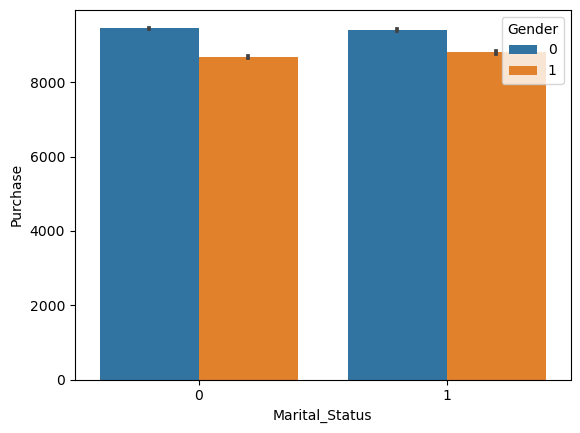

In [107]:
# Marital Status vs Purchases
sns.barplot('Marital_Status', 'Purchase', hue='Gender', data=df)

### Observations -

1. Marital Status has no impact on purchasing.
2. Purchasing of men is higher than women.

<AxesSubplot:>

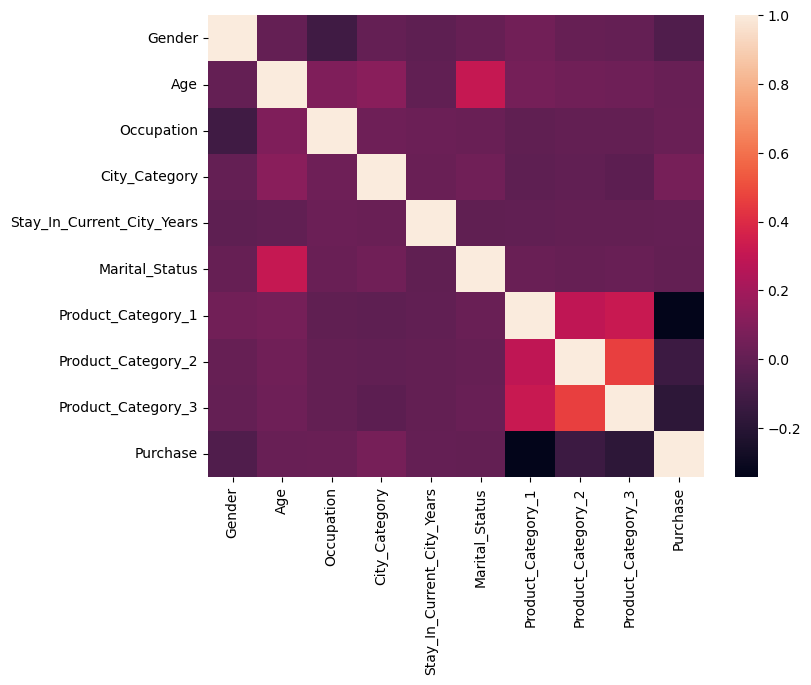

In [125]:
# Calculate Correlations using Heatmap
corr = df.corr()
 
# Heatmap Arguments
plt.figure(figsize=(8,6))
sns.heatmap(corr) 

### Observations -

- Purchasing of products - Product 1 > Product 3 > Product 2

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

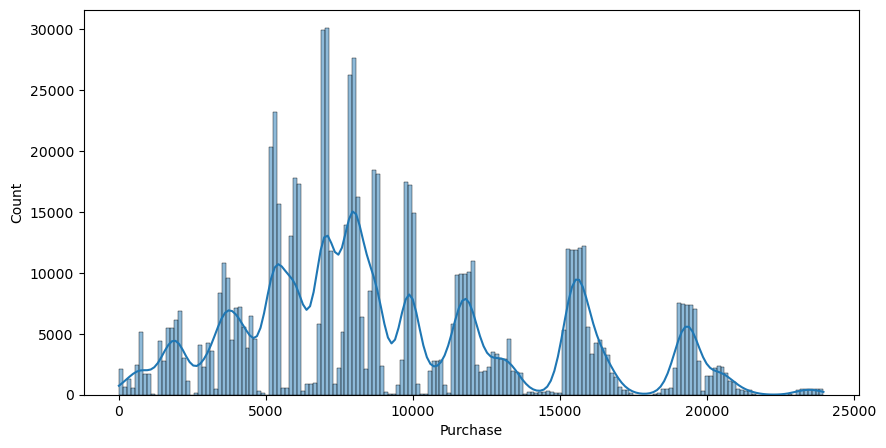

In [131]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10,5))
sns.histplot(df, x='Purchase',
             kde=True) # Plot the density curve too

### Observations -

- Max purchase is around 7000

# 4. Data Preperation & Transformation

## 4.1 Feature Engineering / Scaling

In [78]:
df_test = df[df['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,0,5,7,2,2,1,1,11.0,16.0,NaN
1,P00113442,0,3,17,3,0,0,3,5.0,16.0,NaN
2,P00288442,1,4,1,2,4,1,5,14.0,16.0,NaN
3,P00145342,1,4,1,2,4,1,4,9.0,16.0,NaN
4,P00053842,1,3,1,3,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3,15,2,4,1,8,8.0,16.0,NaN
233595,P00254642,1,3,15,2,4,1,5,8.0,16.0,NaN
233596,P00031842,1,3,15,2,4,1,1,5.0,12.0,NaN
233597,P00124742,1,5,1,3,4,0,10,16.0,16.0,NaN


In [93]:
df_train = df[~df['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,0,6,13,2,1,1,20,8.0,16.0,368.0
550064,P00375436,1,3,1,3,3,0,20,8.0,16.0,371.0
550065,P00375436,1,3,15,2,4,1,20,8.0,16.0,137.0
550066,P00375436,1,7,1,3,2,0,20,8.0,16.0,365.0


In [101]:
X = df_train.drop('Purchase',axis=1)

In [102]:
X.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,1,1,10,1,2,0,3,8.0,16.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0
4,P00285442,0,7,16,3,4,0,8,8.0,16.0


In [98]:
y = df_train['Purchase']
y.head(5)

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [105]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [106]:
# Apply Feature Scaling (Standard Scaler)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)